## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [2]:
#Import necessary packages

#Check working directory
import os
os.getcwd()

#We'll need both pandas, matplotlib, and statsmodel for this exercise
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import math
import numpy as np

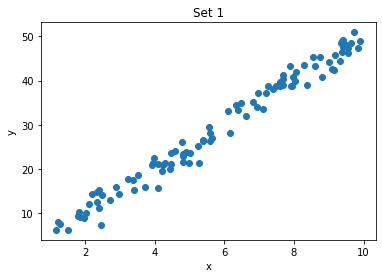

In [3]:
#Dataset 1

#Import set 1
set_1 = pd.read_csv("Set_1.csv")

#Plot set 1 to determine whether a transformation is required
plt.plot(set_1.x, set_1.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 1')
plt.show()

In [4]:
#Based on the plot above, it is apparent that the relationship between x and y is linear in nature. Thus, no transformation is
#required before moving onto the modeling stage.

#Create the linear model
model_1 = sm.ols('y~x', data=set_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           4.47e-84
Time:                        11:35:47   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#Based on the model summary, it appears that the coefficient estimates of 0.2381 and 4.9843 predict Y very effectively, as 
#the R2 is very high at 0.979. The next step is to evaluate whether the linear regression assumptions have been met.

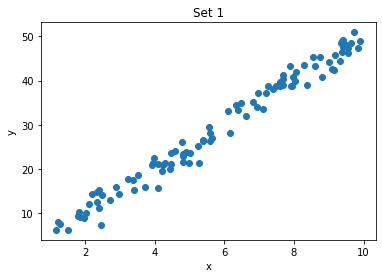

In [6]:
#Evaluating OLS assumptions (simple linear regression)

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_1 df
intercept, slope=model_1.params
set_1['y_est'] = intercept + slope * set_1.x
set_1

#Assumption 1 - Linearity

#Based on the scatter plot created above, we can confirm that X and Y are linearly related, meaning that this assumption is
#satisfied (plot reproduced below for convenience)
plt.plot(set_1.x, set_1.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 1')
plt.show()

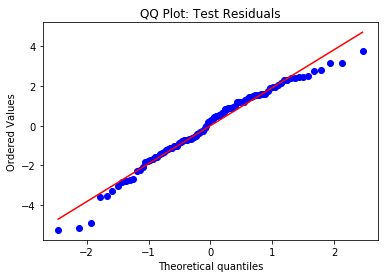

In [7]:
#Assumption 2 - Normality of Error Terms

#Although we don't know the true error terms (difference between observed values and the true values originating from the
#data generating process), we can test residuals as a proxy. Here, a (relatively) straight line is indicative of normally 
#distributed residuals.
import pylab 
import scipy.stats as stats 
stats.probplot(set_1.y-set_1.y_est, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [9]:
#With the exception of a few extreme values (bottom left, top right of plot), the residuals appear to be normally distributed,
#which satisfies the second assumption.

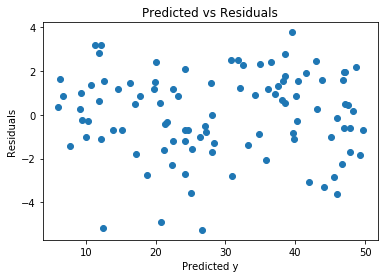

In [10]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_1.y_est, set_1.y-set_1.y_est,'o')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [11]:
#Based on the above plot, it does not appear that variance of residual terms increases as y_est increases, which satifies
#the third assumption of homeoskedasticity (a model with heteroskedasticity, on the other hand, would exhibit a discernible
#upward/downard linear trend for this plot)

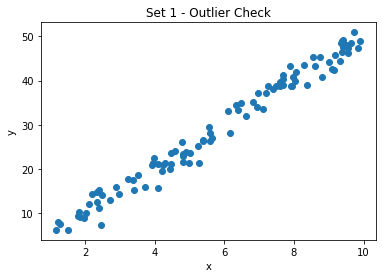

In [13]:
#The final piece of the puzzle for dataset 1 is to identify any potential outliers. By inspection, we see that this dataset
#does not contain outliers.
plt.plot(set_1.x, set_1.y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Set 1 - Outlier Check")
plt.show()

In [227]:
#Summary of Dataset 1

#To summarize the key information regarding dataset 1, I'll create a dataframe with some key model parameters
summary_1 = pd.DataFrame({"Only Model": [0.2381, 4.9843, 0.979, 100]}, 
                          index=['Intercept', 'Slope', 'R-Square', 'NOBS'])

#Interpretation of Intercept and Slope
print("The intercept for this model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.")
print("The slope of this model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.")
print("")
print(summary_1)

The intercept for this model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.
The slope of this model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.

           Only Model
Intercept      0.2381
Slope          4.9843
R-Square       0.9790
NOBS         100.0000


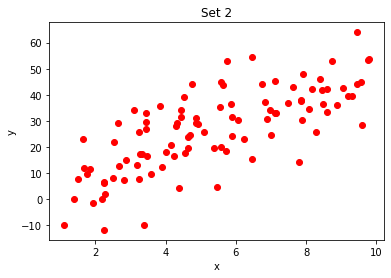

In [14]:
#Dataset 2

#Import set 2
set_2 = pd.read_csv("Set_2.csv")

#Plot set 2 to determine whether a transformation is required
plt.plot(set_2.x, set_2.y, 'or')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 2')
plt.show()

In [15]:
#Although this plot doesn't have an immediately clear linear relationship like plot 1 did, you can still tell it's linear with
#the naked eye - this can be confirmed with a quick correlation calculation
set_2.corr()

,y,x
y,1.000000,0.745168
x,0.745168,1.000000


In [16]:
#Here, we observe approximately a 0.75 correlation between x and y, so no geometric transformation is required for set 2

In [17]:
#Create the model
model_2 = sm.ols('y~x', data=set_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           6.11e-19
Time:                        11:35:49   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Unlike set 1, we observe a much lower R^2, indicating that the model explains much less variation than in set 1. This should
#not be surprising, as the plot hinted at a weaker relationship between x and y

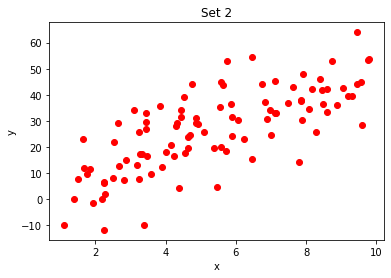

In [19]:
#Evaluating OLS assumptions for set 2 (simple linear regression)

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_2 df
intercept, slope=model_2.params
set_2['y_est'] = intercept + slope * set_2.x
set_2

#Assumption 1 - Linearity

#Based on the scatter plot created above for set 2, we can confirm that X and Y are linearly related, meaning that this 
#assumption is satisfied (plot reproduced below for convenience)
plt.plot(set_2.x, set_2.y, 'or')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 2')
plt.show()

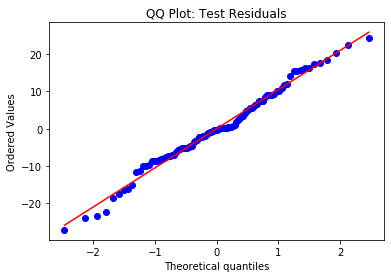

In [88]:
#Assumption 2 - Normality of Error Terms

#As before, we make use of the pylab package.
stats.probplot(set_2.y-set_2.y_est, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [21]:
#As can be seen above, the plot of observed values vs. theoretical quantities meanders slightly from the red line in a
#wavelike manner. This leads me to believe that assumption 2 has been violated for this model.

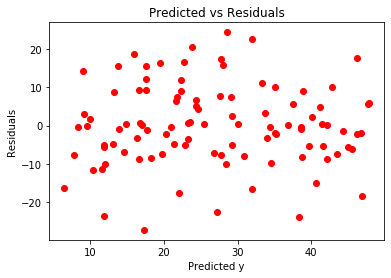

In [22]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_2.y_est, set_2.y-set_2.y_est,'or')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [23]:
#There does not appear to be any obvious trend in this cluster of points, so I'm confident that the third assumption holds
#for set 2

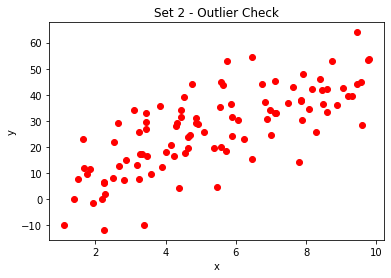

In [25]:
#The final piece of the puzzle for dataset 2 is to identify any potential outliers. By inspection, we see that this dataset
#does not contain outliers.
plt.plot(set_2.x, set_2.y, "or")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Set 2 - Outlier Check")
plt.show()

In [26]:
#There are no obvious outliers in this dataset. While these points are clearly more dispersed than those in set 1, none of
#them are sufficiently far away from any other to be classified as an outlier by inspection.

In [229]:
#To summarize the key information regarding dataset 2, I'll create a dataframe with some key model parameters
summary_2 = pd.DataFrame({"Only Model": [1.0956, 4.7774, 0.555, 100]}, 
                          index=['Intercept', 'Slope', 'R-Square', 'NOBS'])

#Interpretation of Intercept and Slope
print("The intercept for this model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.")
print("The slope of this model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.")
print("In comparison to the model for dataset 1, this model performs poorly, as evidenced by the lower R^2.")
print("")
print(summary_2)

The intercept for this model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.
The slope of this model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.
In comparison to the model for dataset 1, this model performs poorly, as evidenced by the lower R^2.

           Only Model
Intercept      1.0956
Slope          4.7774
R-Square       0.5550
NOBS         100.0000


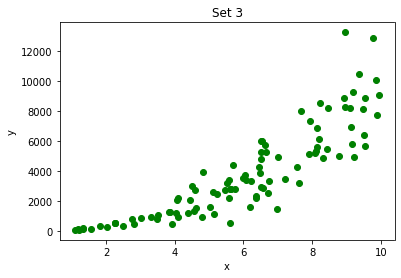

In [45]:
#Dataset 3

#Import set 3
set_3 = pd.read_csv("Set_3.csv")

#Plot set 3 to determine whether a transformation is required
plt.plot(set_3.x, set_3.y, 'go')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 3')
plt.show()

In [28]:
set_3

,y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599270,9.773
3,5491.450053,8.428
4,2838.820108,5.752
...,...,...
95,5242.604150,8.091
96,159.666278,1.325
97,2087.069663,4.446
98,206.866151,1.335


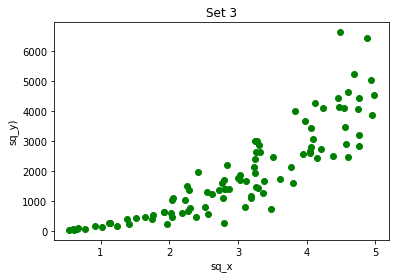

In [29]:
#Immediately, the plot above resembles one-half of the y=x^2 function, so in its current form, it's not suitable for the base
#of a regression model.

#To circumvent this issue, I will try a square root transformation:
set_3['sq_y']=set_3['y']**1/2
set_3['sq_x']=set_3['x']**1/2
set_3

#Reuse plot code from above, but with sqrt(x) and sqrt(y)
plt.plot(set_3.sq_x, set_3.sq_y, 'go')
plt.xlabel('sq_x')
plt.ylabel('sq_y)')
plt.title('Set 3')
plt.show()

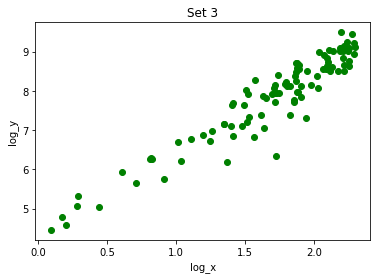

In [96]:
#Unfortunately, this still looks rather suspect, so let's try a log transform instead
set_3['log_y']=np.log(set_3['y'])
set_3['log_x']=np.log(set_3['x'])
set_3

#Reuse plot code from above, but with log(x) and log(y)
plt.plot(set_3.log_x, set_3.log_y, 'go')
plt.xlabel('log_x')
plt.ylabel('log_y')
plt.title('Set 3')
plt.show()

In [31]:
#For set 3, we will have two separate models - the regular one, and the log transformed one

#Create the linear models
model_3_orig = sm.ols('y~x', data=set_3).fit()
model_3_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.04e-31
Time:                        11:35:52   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Log model
model_3_log = sm.ols('log_y~log_x', data=set_3).fit()
model_3_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     904.8
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           2.74e-51
Time:                        11:35:52   Log-Likelihood:                -40.302
No. Observations:                 100   AIC:                             84.60
Df Residuals:                      98   BIC:                             89.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3508      0.120     36.221      0.000       4.112       4.589
log_x          2.0535      0.068     30.079      0.000       1.918       2.189
==============================================================================
Omnibus:                       27.640   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.511
Skew:                          -1.126   Prob(JB):                     1.08e-11
Kurtosis:                       5.656   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#It's interesting to note that the R^2 of the log-transformed model is roughly 0.15 higher than the original model. For both
#models, the predictor and intercept are statistically significant.

#The greater predictive power of the transformed model leads me to believe that it adhered more closely to OLS assumptions.

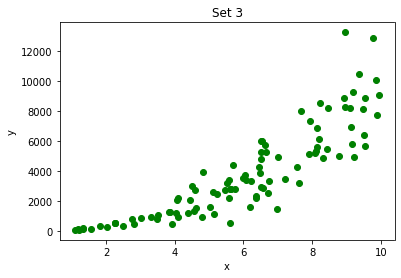

In [90]:
#Testing OLS Assumptions - Original (untransformed) Model

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_3 df
intercept, slope=model_3_orig.params
set_3['y_est'] = intercept + slope * set_3.x
set_3

#Assumption 1 - Linearity

#Based on the scatter plot created above, we can confirm that X and Y are NOT linearly related, meaning that this assumption is
#NOT satisfied (plot reproduced below for convenience)
plt.plot(set_3.x, set_3.y, 'go')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 3')
plt.show()

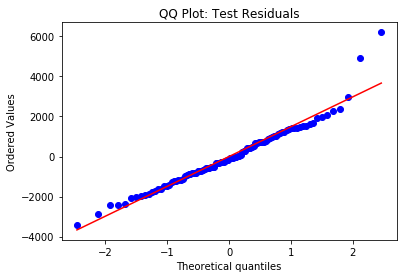

In [91]:
#Assumption 2 - Normality of Error Terms

#Normality test with pylab
stats.probplot(set_3.y-set_3.y_est, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [36]:
#The original model actually exhibits strong normality of error terms. At the extremes, there are a few points that deviate
#from the normal red line, but the linear trend is clear.

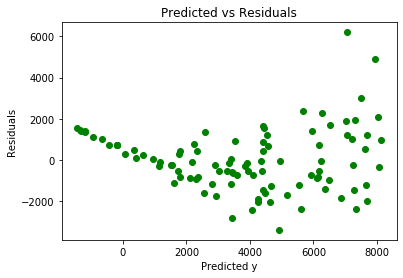

In [37]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_3.y_est, set_3.y-set_3.y_est,'og')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [38]:
#For values of y_est from 0 to 2,000, we see that variance in the residuals decreases linearly. However, for values in excess
#of 2,000, variance becomes a little more stable, but might exhibit a slight upward trend. Either way, this is a clear violation
#of the homeoskedasticity assumption, as the plot contains obvious patterns.

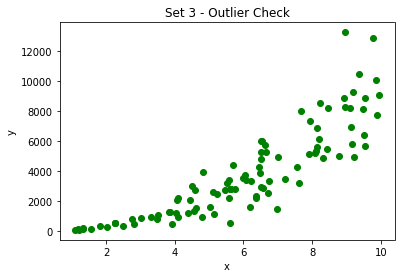

,y,x,y_est,y_est_log
0,6428.915770,9.517,7659.568829,23.893925
1,2640.000728,5.113,2895.204522,14.850342
2,12858.599270,9.773,7936.516437,24.419619
3,5491.450053,8.428,6481.459672,21.657671
4,2838.820108,5.752,3586.491713,16.162524
...,...,...,...,...
95,5242.604150,8.091,6116.884110,20.965644
96,159.666278,1.325,-1202.754606,7.071711
97,2087.069663,4.446,2173.626185,13.480662
98,206.866151,1.335,-1191.936340,7.092245


In [94]:
#The final piece of the puzzle for dataset 3 is to identify any potential outliers. By inspection, we could make a case
#for two potential outliers (top right corner). But, considering we have transformed this dataset anyways, there is no sense
#in pursuing these outliers further, as they disappear after the transformation.
plt.plot(set_3.x, set_3.y, "og")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Set 3 - Outlier Check")
plt.show()

set_3

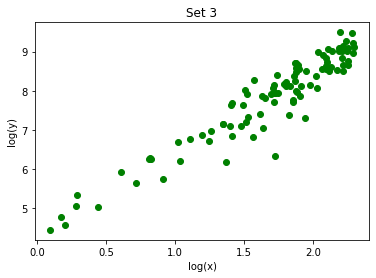

In [236]:
#Testing OLS Assumptions - Transformed Model

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_3 df
intercept, slope=model_3_log.params
set_3['y_est_log'] = intercept + slope * set_3.x
set_3

#Assumption 1 - Linearity

#Based on the scatter plot created above, we can confirm that X and Y are now linearly related after performing the transform,
#which satisfies assumption 1
plt.plot(set_3.log_x, set_3.log_y, 'go')
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.title('Set 3')
plt.show()

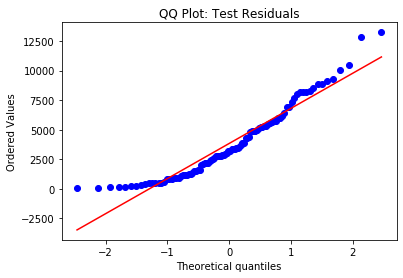

In [100]:
#Assumption 2 - Normality of Error Terms

#Normality test with pylab 
stats.probplot(set_3.y-set_3.y_est_log, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [ ]:
#Based on the QQ plot, it is evident that the transformed model violates the noramlity of errors assumption, as the points
#are not distributed consistenyl along the red line.

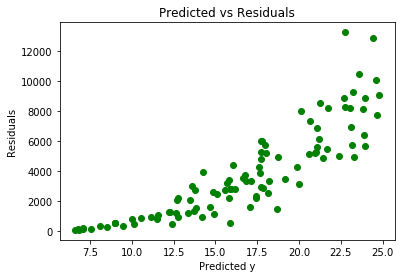

In [101]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_3.y_est_log, set_3.y-set_3.y_est_log,'og')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [ ]:
#The transformed model also violates the homeoskedasticity assumption, as variance in residuals increases as predicted values
#increase.

In [233]:
#Summary of Dataset 3

#To summarize the key information regarding dataset 3, I'll create a dataframe with some key model parameters
summary_3 = pd.DataFrame({"Original Model": [-2636.1748, 1081.8266, 0.755, 100], "Log-Transformed": [4.3508, 2.0535, 0.902, 100]}, 
                          index=['Intercept', 'Slope', 'R-Square', 'NOBS'])

#Interpretation of Intercept and Slope
print("The intercept for the original model can be interpreted as the value of the resposne (Y) when the random variable X", 
      "equals 0.")
print("The intercept of the log-transformed model can be interpreted as the value of the response (log(Y)) when the value",
     "of the regressor X equals 0. Because we've applied the log transform to both sides of the model's equation,", 
      "the same relationship holds true for X and Y themselves.")
print("")
print("The slope of the original model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.")
print("The slope of the log-transformed model can be interpreted as the increase in the reponse (log(Y)) for a unit increase",
      "of the RV log(X). As discussed above with the intercept, since the transform was applied to both variables, the same",
     "relationship holds true for X and Y themselves.")
print("")
print("Due to the improved performance of the transformed model (as evidenced by the higher R^2), we can be confident that",
     "the transformed model adheres more closely to OLS assumptions.")
print("")
print(summary_3)

The intercept for the original model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.
The intercept of the log-transformed model can be interpreted as the value of the response (log(Y)) when the value of the regressor (log(X)) equals 0. Because we've applied the log transform to both sides of the model's equation, the same relationship holds true for X and Y themselves.

The slope of the original model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.
The slope of the log-transformed model can be interpreted as the increase in the reponse (log(Y)) for a unit increase of the RV log(X). As discussed above with the intercept, since the transform was applied to both variables, the same relationship holds true for X and Y themselves.

Due to the improved performance of the transformed model (as evidenced by the higher R^2), we can be confident that the transformed model adheres more closely to OLS assumptions.

   

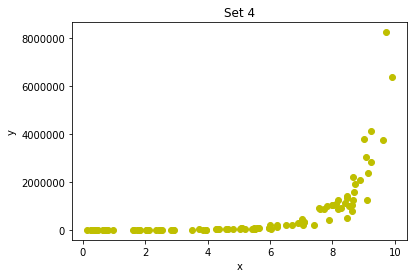

In [52]:
#Dataset 4

#Import set 4
set_4 = pd.read_csv("Set_4.csv")

#Plot set 4 to determine whether a transformation is required
plt.plot(set_4.x, set_4.Y, 'yo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 4')
plt.show()

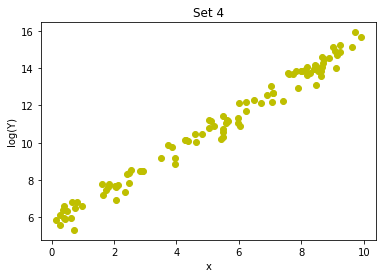

In [80]:
#Here, there is clearly a non-linear relationship between X and Y, so let's try a few transformations to get this relationship
#into a linear form

#After trying several possible transformations, the one that worked best was transforming just Y logarithmically
set_4['log_Y']=np.log(set_4['Y'])
set_4

#Verify that plot is now linear
plt.plot(set_4.x, set_4.log_Y, 'yo')
plt.xlabel('x')
plt.ylabel('log(Y)')
plt.title('Set 4')
plt.show()

In [83]:
#Consequently, we will have two different models for set 4 - the original and the transformed

#Create original model
model_4_orig = sm.ols('Y~x', data=set_4).fit()
model_4_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.87e-12
Time:                        12:08:42   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#Log Y model
model_4_log = sm.ols('log_Y~x', data=set_4).fit()
model_4_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_Y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           6.91e-89
Time:                        12:09:33   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.000       5.509       5.820
x              0.9898      0.013     75.930      0.000       0.964       1.016
==============================================================================
Omnibus:                        7.020   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.256
Skew:                          -0.657   Prob(JB):                       0.0266
Kurtosis:                       2.872   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Here, we observe a stark difference in the model fits; the original model has an R^2 of less than 0.4, while the log_Y model
#has an R^2 over 0.98. This indicates that the transformed model explains much more of the variation in the data than the
#original model

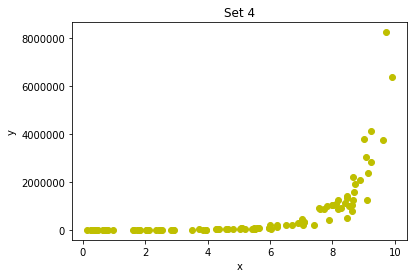

In [86]:
#Testing OLS Assumptions - Original (untransformed) Model

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_4 df
intercept, slope=model_4_orig.params
set_4['y_est'] = intercept + slope * set_4.x
set_4

#Assumption 1 - Linearity

#Based on the scatter plot created above, we can confirm that X and Y are NOT linearly related, meaning that this assumption is
#NOT satisfied (plot reproduced below for convenience)
plt.plot(set_4.x, set_4.Y, 'yo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 4')
plt.show()

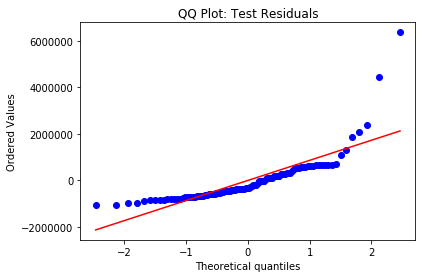

In [87]:
#Assumption 2 - Normality of Error Terms

#Normality test with pylab
stats.probplot(set_4.Y-set_4.y_est, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [102]:
#Above, we see that the blue dots do not follow the red normal line very closely, meaning that the model violates our second
#assumption as well

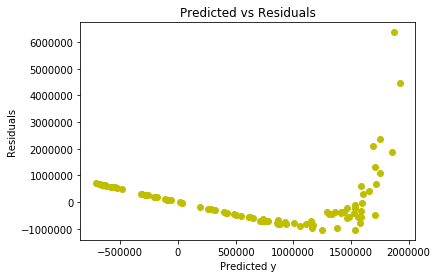

In [104]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_4.y_est, set_4.Y-set_4.y_est,'oy')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [105]:
#Unsurprisingly, the homeoskedasticity assumption is also violated by this model, as variance first decreases as y_est increases
#but then starts to increase somewhere between y_est of 100,000 and 150,000

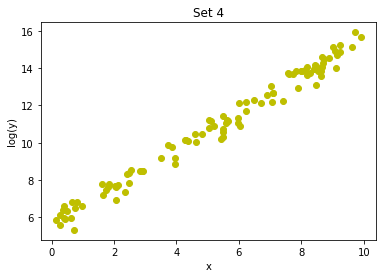

In [235]:
#Testing OLS Assumptions - Log Y (transformed) Model

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_4 df
intercept, slope=model_4_log.params
set_4['y_est_log'] = intercept + slope * set_4.x
set_4

#Assumption 1 - Linearity

#Based on the scatter plot created above, we can confirm that X and Y are NOT linearly related, meaning that this assumption is
#NOT satisfied (plot reproduced below for convenience)
plt.plot(set_4.x, set_4.log_Y, 'yo')
plt.xlabel('x')
plt.ylabel('log(y)')
plt.title('Set 4')
plt.show()

#Note also, that after the transformation, there are no obivous outliers in this dataset.

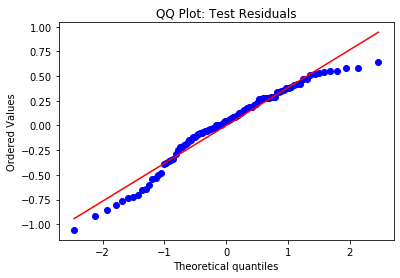

In [110]:
#Assumption 2 - Normality of Error Terms

#Normality test with pylab
stats.probplot(set_4.log_Y-set_4.y_est_log, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [111]:
#While I'm not entirely confident that this model passes the normality test, the plotted points come much closer to following
#the normal line than they did in the untransformed model. This is a good sign.

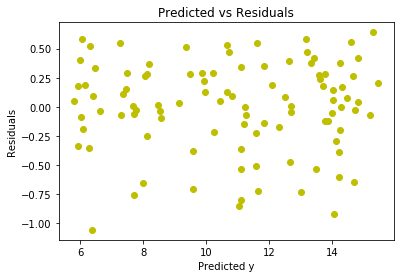

In [112]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_4.y_est_log, set_4.log_Y-set_4.y_est_log,'oy')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [ ]:
#The transformed model appears to adhere to our third assumption, as there is no observable pattern in the plot of residuals
#vs. predicted y

In [241]:
#Summary of Dataset 4

#To summarize the key information regarding dataset 3, I'll create a dataframe with some key model parameters
summary_4 = pd.DataFrame({"Original Model": [-7.535e+05, 2.707e+05, 0.38, 100], "Log-Transformed": [5.6647, 0.9898, 0.983, 100]}, 
                          index=['Intercept', 'Slope', 'R-Square', 'NOBS'])

#Interpretation of Intercept and Slope
print("The intercept for the original model can be interpreted as the value of the resposne (Y) when the random variable X", 
      "equals 0.")
print("The intercept of the log-transformed model (B0) can be interpreted as the value of the response (log(Y)) when the value",
     "of the regressor (X) equals 0. If we wanted to express this relationship in terms of Y itself (and not log(Y)), we could", 
      "say the value of the response, Y, (when X=0) is equal to e^B0, where B0 is the intercept.")
print("")
print("The slope of the original model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.")
print("The slope of the log-transformed model can be interpreted as the increase in the reponse (log(Y)) for a unit increase",
      "of the RV X. If we wanted to know how Y itself varies with a change in X, we could say that the response, Y, increases",
     "linearly as a function of e^(B0+B1X), where B1 is the slope. So, a unit increase is B1 does not imply a unit increase",
     "in Y.")
print("")
print("Due to the improved performance of the transformed model (as evidenced by the higher R^2), we can be confident that",
     "the transformed model adheres more closely to OLS assumptions.")
print("")
print(summary_4)

The intercept for the original model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.
The intercept of the log-transformed model (B0) can be interpreted as the value of the response (log(Y)) when the value of the regressor (X) equals 0. If we wanted to express this relationship in terms of Y itself (and not log(Y)), we could say the value of the response, Y, (when X=0) is equal to e^B0, where B0 is the intercept.

The slope of the original model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.
The slope of the log-transformed model can be interpreted as the increase in the reponse (log(Y)) for a unit increase of the RV X. If we wanted to know how Y itself varies with a change in X, we could say that the response, Y, increases linearly as a function of e^(B0+B1X), where B1 is the slope. So, a unit increase is B1 does not imply a unit increase in Y.

Due to the improved performance of the transformed model (as 

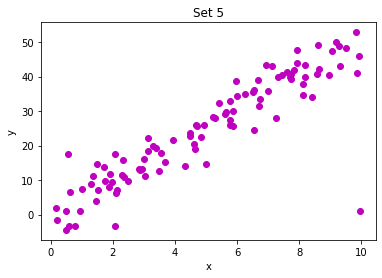

In [215]:
#Dataset 5

#Import set 2
set_5 = pd.read_csv("Set_5.csv")

#Plot set 2 to determine whether a transformation is required
plt.plot(set_5.X, set_5.Y, 'om')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 5')
plt.show()

In [137]:
#Here, we clearly have a linear relationship , but we have a very outlier in the bottom right corner. There are two other
#borderline outliers as well, at roughly (2, 0.25) and (0.2, 18), but to me, they're close enough to keep. 
#Before removing them, I'll run the original model and see how it affects the model's key parameters (i.e. slope, intercept, 
#R^2).

In [216]:
#Original Model
model_5_orig = sm.ols('Y~X', data=set_5).fit()
model_5_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           4.70e-37
Time:                        14:59:43   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
X              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
#Now let's try removing the outlier in the bottom right corner of the plot. We know its value is approximately (10, 0), so
#we can find this point in the dataframe and remove it.
print(set_5.to_string())

             Y        X
0    47.320319  9.05270
1    39.862491  7.31350
2    42.225779  8.64710
3    30.010689  5.85790
4    43.900459  7.93570
5    25.911334  5.75610
6    23.739310  4.48320
7    40.810390  7.72760
8    48.725594  9.28480
9    26.023814  4.67720
10   39.877756  8.18930
11   17.813641  3.55080
12    6.654544  0.63300
13   11.778539  1.89600
14    9.606713  2.49260
15   34.857496  6.26530
16   49.263557  8.61400
17   11.145343  3.04670
18   21.719755  3.93120
19   28.343163  5.22570
20   41.239770  7.59080
21   22.801657  4.46750
22   50.135544  9.19990
23   -3.222694  0.59470
24   52.839325  9.81980
25   13.714705  1.72460
26   -3.375994  2.08390
27    6.348974  2.08470
28   35.783242  6.98560
29   32.289571  5.41380
30   39.317533  7.74380
31   14.589749  5.00320
32   25.800704  4.71470
33   24.463927  6.54990
34   25.659742  5.86050
35   40.311554  7.46020
36   13.226107  2.82750
37   18.380021  3.12160
38   16.025912  3.00960
39   43.302718  6.92260
40   13.204304  

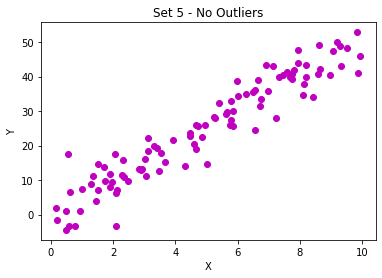

In [219]:
#Based on the table printed above, it looks like the outlier is actually the last point in the dataset - observation 100.
#I'll remove it using iloc.
set_5_tidy = set_5.iloc[0:100, :]

#Plot set_5_tidy to ensure proper observation was removed
plt.plot(set_5_tidy.X, set_5_tidy.Y, "mo")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Set 5 - No Outliers")
plt.show()

In [220]:
#Rerun the model to compare parameters
model_5_tidy = sm.ols('Y~X', data=set_5_tidy).fit()
model_5_tidy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           3.84e-52
Time:                        15:00:04   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.916      -1.954       1.756
X              5.0705      0.165     30.753      0.000       4.743       5.398
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.760
Skew:                          -0.158   Prob(JB):                        0.252
Kurtosis:                       3.750   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
#By manually comparing the two regression outputs manully, we can construct a table to facilitate comapre of the models.

df_compare_5 = pd.DataFrame({"With Outlier": [0.9213, 4.7671, 0.806], "Without Outlier": [-0.0993, 5.0705, 0.906]}, 
                          index=['Intercept', 'Slope', 'R-Square'])
df_compare_5

,With Outlier,Without Outlier
Intercept,0.9213,-0.0993
Slope,4.7671,5.0705
R-Square,0.8060,0.9060


In [161]:
#As can be seen above, the model explains much more of the variation in the data without the outlier, as the R^2 is almost 0.1
#higher. Additionally, it's interesting to note that the outlier had such a huge impact on the intercept of the model. This is
#not surprising, as the line of best fit would be moved considerably by the outlier.

#This indicates that the outlier has LEVERAGE.

In [162]:
#Let's circle back and test the revised model's assumptions (makes more sense to test better model)

C:\Users\alex_\Anaconda_3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


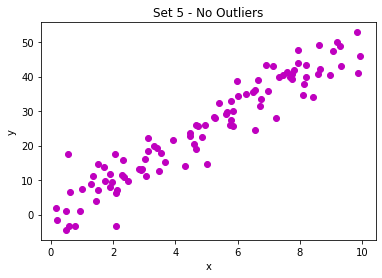

In [170]:
#Assumption 1 - Linearity

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_1 df
intercept, slope=model_5_tidy.params
set_5_tidy['y_est'] = intercept + slope * set_5_tidy.X
set_5_tidy

#Based on the scatter plot created above for set 5, we can confirm that X and Y are linearly related, meaning that this 
#assumption is satisfied (plot reproduced below for convenience)
plt.plot(set_5_tidy.X, set_5_tidy.Y, 'om')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 5 - No Outliers')
plt.show()

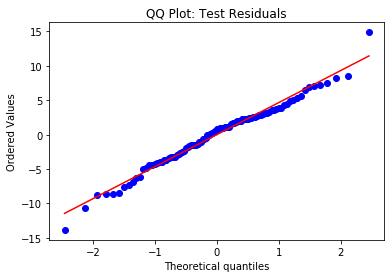

In [172]:
#Assumption 2 - Normality of Error Terms

#As before, we make use of the pylab package.
stats.probplot(set_5_tidy.Y-set_5_tidy.y_est, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [173]:
#Based on the above QQ plot, we see that the model satisfies the normality assumption, as the points follow the straight line
#fairly closely

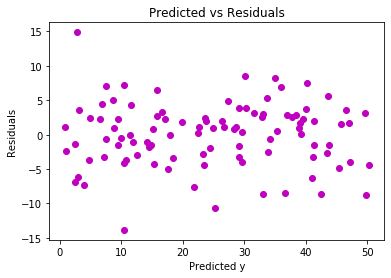

In [175]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_5_tidy.y_est, set_5_tidy.Y-set_5_tidy.y_est,'om')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [ ]:
#While there are a few suspect points, such as the one in the top left corner, this plot demonstrates that the outlier-free
#model satisfies the homeoskedasticity assumption, as there is no discernable pattern in the data.

In [223]:
#Summary of Dataset 5

#To summarize the key information regarding dataset 6, I'll create a dataframe with some key model parameters
summary_5 = pd.DataFrame({"Original Model": [0.9213, 4.7671, 0.806, 101], "Outlier-Free Model": [-0.0993, 5.0705, 0.906, 100]}, 
                          index=['Intercept', 'Slope', 'R-Square', 'NOBS'])
print("The intercept for each model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.")
print("The slope of each model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.")
print("For dataset 5, the outlier-free model performed more effectively, as evidenced by the higher R^2. The significant",
     "difference in performance also indicates that the outlier has leverage.")
print("")
print(summary_5)

The intercept for each model can be interpreted as the value of the resposne (Y) when the random variable X equals 0.
The slope of each model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.
For dataset 5, the outlier-free model performed more effectively, as evidenced by the higher R^2. The significant difference in performance also indicates that the outlier has leverage.

           Original Model  Outlier-Free Model
Intercept          0.9213             -0.0993
Slope              4.7671              5.0705
R-Square           0.8060              0.9060
NOBS             101.0000            100.0000


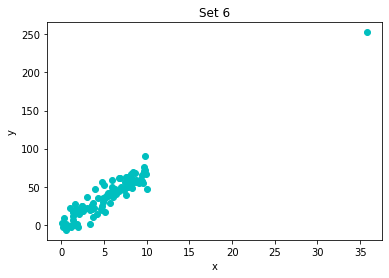

In [180]:
#Dataset 6

#Import set 2
set_6 = pd.read_csv("Set_6.csv")

#Plot set 2 to determine whether a transformation is required
plt.plot(set_6.x, set_6.y, 'oc')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 6')
plt.show()

In [181]:
#As with dataset 5, this plot has a very obvious outlier at approximately (35, 250), so let's search the dataset for this point
#and remove it

#Print full dataset
print(set_6.to_string())

          y        x
0     -2.76   1.1290
1     61.07   6.9100
2     52.85   7.8374
3     -2.88   0.1335
4     59.05   9.2425
5     46.86   9.9926
6     41.27   5.4567
7     24.45   2.3628
8     49.92   7.7712
9     34.87   5.0911
10    50.08   5.8775
11    -1.20   1.0513
12    67.86   8.6587
13    50.11   6.9500
14    35.59   4.8714
15    58.82   5.9794
16    24.57   4.7624
17    56.70   7.4212
18    24.66   2.3518
19    19.09   4.7791
20    62.00   8.1479
21    48.13   8.2098
22    37.17   5.4460
23    56.27   8.4028
24    66.52   9.9014
25    37.02   6.0243
26    20.65   1.8010
27    19.13   2.1140
28    90.71   9.7829
29    18.38   2.5393
30    52.27   7.7541
31    22.65   3.7960
32    20.58   3.6352
33     5.76   1.3574
34    25.45   3.5957
35    47.25   6.3027
36    -0.58   1.4334
37     1.65   1.3038
38    44.50   6.7741
39    62.76   7.5684
40    62.91   8.0215
41    54.52   9.1155
42    47.32   3.9302
43    57.24   8.1085
44    58.67   9.3468
45    -6.76   0.5072
46    17.74  

In [183]:
#We see that the point (35.7834, 252.84) is our outlier, so let's remove it from the dataset
set_6_tidy = set_6.iloc[0:100, :]
set_6_tidy

,y,x
0,-2.76,1.1290
1,61.07,6.9100
2,52.85,7.8374
3,-2.88,0.1335
4,59.05,9.2425
...,...,...
95,57.89,7.6842
96,56.70,8.7167
97,70.34,9.6165
98,20.79,1.7477


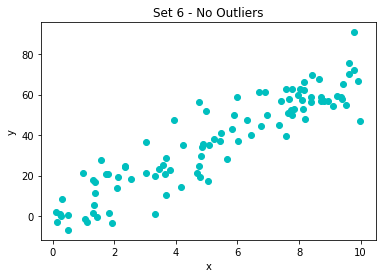

In [185]:
#Plot set_6_tidy to confirm outlier has been removed
plt.plot(set_6_tidy.x, set_6_tidy.y, "co")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 6 - No Outliers')
plt.show()

In [187]:
#Now, let's compare the regression models with and without the outlier

#Original Model
model_6_orig = sm.ols('y~x', data=set_6).fit()
model_6_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           2.49e-54
Time:                        14:23:29   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3054      1.534     -0.199      0.843      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.493   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.261
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#Tidy Model
model_6_tidy = sm.ols('y~x', data=set_6_tidy).fit()
model_6_tidy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           2.29e-40
Time:                        14:24:24   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0194      1.899     -0.010      0.992      -3.788       3.749
x              6.9702      0.311     22.420      0.000       6.353       7.587
==============================================================================
Omnibus:                        0.458   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.261
Skew:                           0.123   Prob(JB):                        0.878
Kurtosis:                       3.044   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
#Interesting, we actually see a deterioration in model performance AFTER removing the outlier here. Perhaps this is because the
#outlier happens to fall along/near the line of best fit for the original model. See below for a comparison of model parameters
#with and without the outlier - this suggests the outlier has LEVERAGE.
df_compare_6 = pd.DataFrame({"With Outlier": [-0.3054, 7.0272, 0.913], "Without Outlier": [-0.0194, 6.9702, 0.837]}, 
                          index=['Intercept', 'Slope', 'R-Square'])
df_compare_6

,With Outlier,Without Outlier
Intercept,-0.3054,-0.0194
Slope,7.0272,6.9702
R-Square,0.9130,0.8370


In [191]:
#Since the original model is actually the better one, let's use that one and test whether it satisfies our assumptions

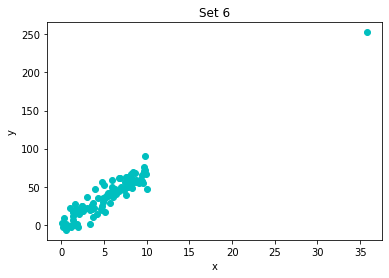

In [192]:
#Evaluating OLS assumptions (simple linear regression)

#In evaluating the regression assumptions, it will be helpful to add our predicted values to the set_6 df
intercept, slope=model_6_orig.params
set_6['y_est'] = intercept + slope * set_6.x
set_6

#Assumption 1 - Linearity

#Based on the scatter plot created above, we can confirm that X and Y are linearly related, meaning that this assumption is
#satisfied (plot reproduced below for convenience)
plt.plot(set_6.x, set_6.y, 'oc')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Set 6')
plt.show()

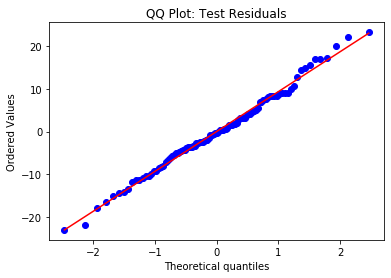

In [193]:
#Assumption 2 - Normality of Error Terms
stats.probplot(set_6.y-set_6.y_est, dist="norm", plot=pylab) #Residuals=y_observed-y_est 
pylab.title('QQ Plot: Test Residuals') 
pylab.show()

In [194]:
#Since the points follow the line very closely, I'm confident in saying this model satisfies the normality of errors assumption

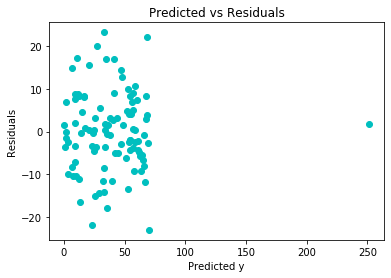

In [195]:
#Assumption 3 - Homeoskedascticity (Equal Variance in Error Terms)

#By plotting residuals vs predicted values of y, we can determine if variance increases (or decreases) as y_est increases
plt.plot(set_6.y_est, set_6.y-set_6.y_est,'oc')
plt.xlabel('Predicted y')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.tick_params(axis='x')
plt.tick_params(axis='y')

In [196]:
#Although this plot looks odd, it actually satifies assumption 3, as the outlier's variance lies roughly along the line of
#best fit for this plot. THus, I'm confident in saying that the original model meets the homeoskedasticity assumption.

In [224]:
#Summary of Dataset 6

#To summarize the key information regarding dataset 6, I'll create a dataframe with some key model parameters
summary_6 = pd.DataFrame({"Original Model": [-0.3054, 7.0272, 0.913, 101], "Outlier-Free Model": [-0.0194, 6.9702, 0.837, 100]}, 
                          index=['Intercept', 'Slope', 'R-Square', 'NOBS'])

#Interpretation of Intercept and Slope
print("The intercept for both models can be interpreted as the value of the resposne (Y) when the random variable X equals 0.")
print("The slope of each model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.")
print("For dataset 6, the outlier-free model performed LESS effectively, as evidenced by the lower R^2. The significant", 
     "difference in performance also indicates that the outlier has leverage.")
print("")
print(summary_6)

The intercept for both models can be interpreted as the value of the resposne (Y) when the random variable X equals 0.
The slope of each model can be interpreted as the increase in the reponse (Y) for a unit increase of the RV X.
For dataset 6, the outlier-free model performed LESS effectively, as evidenced by the lower R^2. The significant difference in performance also indicates that the outlier has leverage.

           Original Model  Outlier-Free Model
Intercept         -0.3054             -0.0194
Slope              7.0272              6.9702
R-Square           0.9130              0.8370
NOBS             101.0000            100.0000
